In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/clean/immoscout_only_numeric.csv')
df.head()

,Unnamed: 0,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,gde_workers_total,type,rooms,floor,living_space_m2,floor_space_m2,plot_area_m2,availability,municipality,price
0,0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,penthouse,5.0,4,100.0,NaN,NaN,On request,Biberstein,1150000.0
1,1,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,terrace-house,5.0,NaN,156.0,242.0,222,On request,Biberstein,1420000.0
2,2,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,0.0,0.334957,...,33493.0,penthouse,5.0,NaN,93.0,NaN,NaN,NaN,NaN,720000.0
3,3,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,detached-house,5.0,NaN,154.0,257.0,370,On request,Biberstein,1430000.0
4,4,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,0.0,0.133498,...,1355.0,flat,5.0,0,142.0,NaN,NaN,On request,Küttigen,995000.0


In [4]:
x = df['rooms'].values.reshape(1,-1)
x1 = df['living_space_m2'].values.reshape(1,-1)
x2 = df['distanceToTrainStation'].values.reshape(1,-1)
y = df['price'].values.reshape(1,-1)

In [5]:
#Hat es Np.any(np.isnan()) in den Daten?
np.any(np.isnan(x)), np.any(np.isnan(y)), np.any(np.isnan(x1)), np.any(np.isnan(x2))

(True, True, True, False)

In [6]:
#NANs entfernen
mask = ~pd.isna(x) & ~pd.isna(x1) & ~pd.isna(x2) & ~pd.isna(y)
x = x[mask]
x1 = x1[mask]
x2 = x2[mask]
y = y[mask]
x = x.reshape(-1,1)
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
# dataframe with x,x1,x2,y
df_model = pd.DataFrame({'x':x[:,0], 'x1':x1[:,0], 'x2':x2[:,0], 'y':y[:,0]})
df_model.head()

,x,x1,x2,y
0,5.0,100.0,3.038467,1150000.0
1,5.0,156.0,3.038467,1420000.0
2,5.0,93.0,0.909587,720000.0
3,5.0,154.0,3.038467,1430000.0
4,5.0,142.0,1.460245,995000.0


In [24]:
# splitting dataframe into train and test data
train, test = train_test_split(df_model, test_size=0.1, random_state=42)
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (10395, 4)
Test data shape:  (1156, 4)


In [25]:
# select label and features
train_X = train[["x", "x1", "x2"]]
train_y = train["y"]

test_X = test[["x", "x1", "x2"]]
test_y = test["y"]

In [26]:
# Model Linear Regression
model = LinearRegression()
model.fit(train_X, train_y)

# Model evaluation
test_pred = np.round(model.predict(test_X))

# Score calculation
test_score = model.score(test_X, test_y)

# get test_score result
print("Test score: ", test_score)

Test score:  0.2922285531806884


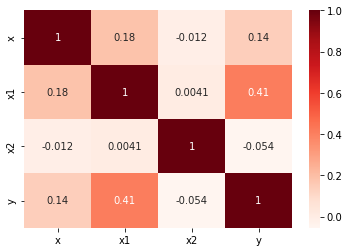

In [27]:
# create correlation plot
corr = df_model.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

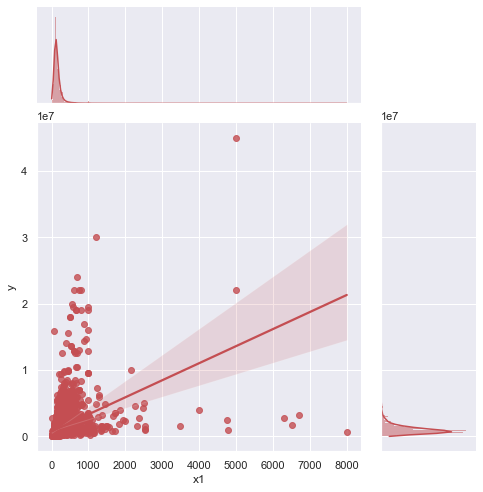

In [32]:
sns.set()
ax = sns.jointplot(x='x1', y='y', data=df_model, kind='reg', color='r', height=7, ratio=3)
plt.show()